## 基础知识

### 图形绘制

(-1.5, 1.5)

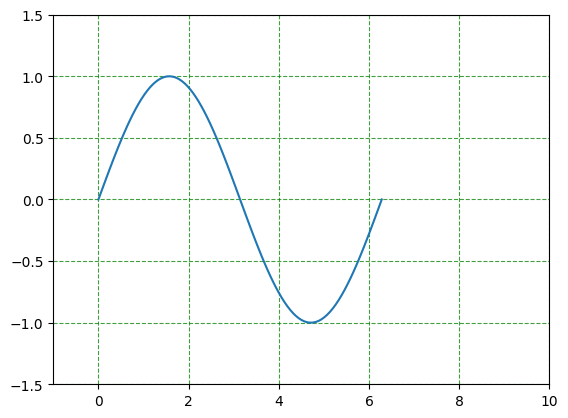

In [2]:
import numpy as np
import matplotlib.pyplot as plt # 画图的画笔

x = np.linspace(0,2*np.pi,100)
y = np.sin(x)
plt.plot(x,y)
plt.grid(linestyle = '--', # 网格线样式
         color = 'green', # 颜色
         alpha = 0.75) #  透明度，网格线
plt.xlim([-1,10]) # 横坐标范围
plt.ylim([-1.5,1.5]) # 纵坐标范围

### 坐标轴刻度，标签，标题

$\frac{\pi}{2}$

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(x,y)

plt.yticks([-1,0,1],['min',0,'max'],fontsize = 18)
plt.ylabel('y = sin(x)',rotation = 0,fontsize = 18,ha = 'right')
_ = plt.xticks([0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],
           [0,'$\\frac{\pi}{2}$',r'$\pi$',r'$\frac{3\pi}{2}$',r'$2\pi$'],
           fontsize = 18,
           color = 'red')

plt.title('正弦波',fontsize = 18,color = 'red',family = 'Heiti TC')

In [ ]:
# 电脑上字体
from matplotlib.font_manager import FontManager
fm = FontManager()

In [ ]:
[font.name for font in fm.ttflist]

### 图例

In [ ]:
x = np.arange(0,2*np.pi,step = np.pi/50) # 100份数据
plt.figure(figsize=(9,6))
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))
# 这里宽度高度都是相对的
x = 0 # 图片宽度
y = 1.05 # 图片的高度
width = 1
height = 0.2
plt.legend(['Sin','Cos'],fontsize = 18,loc = 'center',ncol = 2,
           bbox_to_anchor = (x,y,width,height))# 指定图例相对位置

### 脊柱移动

In [ ]:
x = np.linspace(-np.pi,np.pi,100)
plt.figure(figsize=(9,6))
plt.plot(x,np.sin(x),x,np.cos(x))

axes = plt.gca() # get current axes 轴面，子视图
axes.spines['top'].set_color('white')
axes.spines['right'].set_color('white')

axes.spines['left'].set_position(('data',0)) # data 表示数据，表示数值
axes.spines['bottom'].set_position(('data',0))

plt.yticks([-1,0,1])
_ = plt.xticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],
           [r'$-\pi$',r'$-\frac{\pi}{2}$','0',r'$\frac{\pi}{2}$',r'$\pi$'],
           fontsize = 18,
           color = 'red')

### 图片保存

In [ ]:
plt.figure(figsize=(9,6),linewidth = 5) # 创建了一个figure 图片
plt.plot(x,np.sin(x),x,np.cos(x)) # 在轴面中，进行图片的绘制
plt.legend(['Sin','Cos'],loc = 'center',ncol = 2,bbox_to_anchor = (0,1.05,1,0.2),fontsize = 18)

axes = plt.gca()
axes.set_facecolor('lightgreen') # 轴面，被figure（图片）包围着

plt.savefig('./image.png',
            dpi = 100,
            facecolor = 'red', # 大图片和轴面（子视图间隔的颜色）
            edgecolor = 'lightgreen', # 边界的颜色
            bbox_inches = 'tight') # 设置紧凑显示，保存整张图片

## 风格和样式

### 颜色、线宽、线型、透明度、点型

In [ ]:
x = np.linspace(0,2*np.pi,20)

y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x,y1,color = 'red',linestyle = '--',alpha = 0.5,marker = 'o')
plt.plot(x,y2,color = 'k',linestyle = '-.',marker = '*')
plt.plot(x,y1 + y2,color = 'indigo',linestyle = ':',marker = 'd')
plt.plot(x,y1 - 2*y2,color = '#FF00FF',linestyle = '--',marker = '1')
plt.plot(x,2*y1 + y2,
         color = (0.2,0.6,0.5), # 红绿蓝，三原色
         ls = '-.',marker = '3',markersize = 20,linewidth = 5)

### 更多设置

In [ ]:
x = np.linspace(0,5,50)

def fun(x):
    return np.exp(-x)*np.cos(2*np.pi*x)

y = fun(x)
plt.figure(figsize=(9,6))
plt.plot(x,y,marker = 'o',
         color = 'green',
         markersize = 12,
         markerfacecolor = 'red',
         linestyle = '--',
         markeredgecolor = 'blue',
         markeredgewidth = 3,
         alpha = 0.7)

## 多图布局

### 子视图

In [ ]:
plt.figure(figsize=(9,6))

x = np.linspace(0,2*np.pi,20)
y = np.sin(x)

axes = plt.subplot(2,2,1) # 子视图，轴面，左上角位置
axes.set_facecolor('green')
axes.plot(x,y,color = 'red')

axes = plt.subplot(222) # 连起来写，右上角，轴面，X轴Y轴
line, = axes.plot(x,y) # 调用plot返回绘制对象，一条线
line.set_color('green')
line.set_linestyle('--')
line.set_marker('o')

axes = plt.subplot(2,1,2) # 2行，一列第二个，就是已经画好的子视图下面的区域
x = np.linspace(-np.pi,np.pi,200)
y = np.sin(x*x)

# axes.plot(x,y)
plt.plot(x,y) # 默认持有最近的这个子视图，索引调用plot方法，绘制图形就是像最近这个轴面绘制

### 嵌套

In [ ]:
fig = plt.figure(figsize=(9,6)) # fig就是整张图片

x = np.linspace(0,2*np.pi,100)
y = np.sin(x)

plt.plot(x,y)

# left,bottom坐标位置，范围0 ~ 1 0表示左下角，1 表示右上角
# width 宽度
# height 高度
ax = plt.axes([0.6,0.6,0.2,0.2]) # 轴面 [left, bottom, width, height]
ax.plot(x,y,color = 'red')

ax = fig.add_axes([0.2,0.2,0.2,0.2])
ax.plot(x,y,color = 'green',ls  = '--')

### 多图布局分格显示

#### 均匀布局

In [ ]:
### x = np.linspace(0,2*np.pi,200)

fig,((ax11,ax12,ax13),(ax21,ax22,ax23),(ax31,ax32,ax33)) = plt.subplots(3,3) # 返回子视图

fig.set_figwidth(12)
fig.set_figheight(9)

ax11.plot(x,np.sin(x))
ax12.plot(x,np.cos(x))
ax13.plot(x,np.tan(x))
ax21.plot(x,np.tanh(x))
ax22.plot(x,np.sin(x*x))
ax23.plot(x,np.cos(x*x))
ax31.plot(x,np.sin(x)*np.cos(x))
ax32.plot(x,np.sin(x) + np.cos(x))
ax33.plot(x,np.sin(2*np.pi*x)*np.exp(-x))

plt.tight_layout() # 紧凑布局

### 不均匀布局

In [ ]:
from matplotlib import gridspec

In [ ]:
plt.figure(figsize=(12,9))

x = np.linspace(0,2*np.pi,200)

gs = gridspec.GridSpec(3,3) # 3行3列

ax = plt.subplot(gs[0,:]) # :默认情况，占满，3列
ax.plot(x,np.sin(10*x))

ax = plt.subplot(gs[1,:2])
ax.set_facecolor('green')
ax.plot(x,np.cos(x),color = 'red')

ax = plt.subplot(gs[1:,2])
ax.plot(x,np.sin(x))

ax = plt.subplot(gs[2,0])
ax.plot(x,np.cos(2*np.pi*x)*np.exp(-x))

ax = plt.subplot(gs[2,1])
ax.plot([0,1,2],[0,1,2],marker = 'o')

### 双轴显示

In [ ]:
x = np.linspace(-np.pi,np.pi,200)

y1 = np.sin(x)
y2 = np.exp(x)
plt.figure(figsize=(9,6))
ax1 = plt.subplot(111)
ax1.plot(x,y1,color = 'red')
plt.yticks(color = 'red',fontsize = 18)
plt.ylabel('Sin',fontsize=18,color = 'red')

# 两个子视图公用一个X轴，两个Y轴
ax2 = ax1.twinx() # !!! 双x轴，共享X轴，返回一个新的子视图;twiny
ax2.plot(x,y2,color = 'blue')
plt.yticks(color = 'blue',fontsize = 18)
plt.ylabel('Exp',color = 'blue',fontsize = 18)

## 文本、注释、箭头

### 文本

In [ ]:
plt.figure(figsize=(9,6))

x = np.linspace(0,2*np.pi,200)

y = np.cos(2*np.pi*x)*np.exp(-x)
plt.plot(x,y)

plt.text(x = 3,y = 0.4,s = r'$exp(-x)*sin(2\pi x)$',fontsize = 18,color = 'red')

plt.xlabel('X',fontsize = 18)
plt.ylabel('Y',fontsize = 18)

plt.title('Exp decay',fontdict = {'color':'red','fontsize':'18','alpha':0.4,'rotation':30})

plt.suptitle('指数衰减',fontfamily = 'Kaiti SC',fontsize = 18)

In [ ]:
from matplotlib.font_manager import FontManager

In [ ]:
fm = FontManager()

In [ ]:
[font.name for font in fm.ttflist]

### 箭头

In [ ]:
plt.figure(figsize=(9,6))

data = np.random.randint(0,10,size = (10,2))

plt.scatter(x = data[:,0],y = data[:,1],color = 'green',marker = '*',s = 100)

for i in range(9):
    start = data[i] # 起始
    end = data[i + 1] # 终点
    plt.arrow(x = start[0],y = start[1], # 起点坐标
              dx = end[0] - start[0],dy = end[1] - start[1],#水平和竖直举例
              lw = 2,# 线宽
              head_width = 0.2,# 箭头宽度
              length_includes_head = True)# 长度计算包含箭头长度)
    plt.text(start[0],start[1],i,fontsize = 18,color = 'red')
    if i == 8:
        plt.text(end[0],end[1],i + 1,fontsize = 18,color = 'red')

### 注释

In [ ]:
plt.figure(figsize=(9,6))

x = np.linspace(0,20,300)

plt.plot(x,np.sin(x))

plt.ylim([-2,2])

plt.annotate('max', # 文本
             xy=(np.pi/2,1), # 指向位置的坐标点
             xytext =(3,1.5), # 文本位置
             arrowprops = {'width':2,'headwidth':6,'headlength':15,'shrink':0})

plt.annotate('median',
            xy = (2*np.pi,0),
            xytext = (1.25,-0.65),
            arrowprops = {'arrowstyle':'fancy'})

plt.annotate('min',
             xy = (3.5*np.pi,-1),
             xytext = (15.5,-1.65),
             arrowprops = {'arrowstyle':'-|>',
#                            水平向右是0度，竖直向上90，水平向左是180，竖直向下270，-90
#                            'connectionstyle':'angle,angleA=90,angleB=180,rad=10',
#                            'connectionstyle':'angle3,angleA=60, angleB=0',
                           'connectionstyle':'arc,angleA=90, angleB=0, armA=30, armB=60, rad=10'})

## 常用图表

### 折线图

In [ ]:
plt.figure(figsize=(9,6))
y = np.random.randint(0,10,15)
plt.plot(y,marker = '*') # 只给了一个参数，Y轴，X轴默认：从0~N
plt.plot(y.cumsum(),marker = 'o')

# 多图布局
fig,axes = plt.subplots(2,1)
fig.set_figwidth(9)
fig.set_figheight(6)
axes[0].plot(y,marker = '*')
axes[1].plot(y.cumsum(),marker = 'o')

### 条形图、柱状图

In [ ]:
y1 = np.random.randint(20,35,6) # 男
y2 = np.random.randint(20,35,6) # 女

plt.figure(figsize=(9,6))
x = np.array(['G1','G2','G3','G4','G5','G6'])

plt.bar(x,y1,color = 'orange',width = 0.5,yerr = 4,ecolor = 'red',capsize = 5)
plt.bar(x,y2,bottom = y1,width = 0.5,yerr = 2,ecolor = 'red',capsize = 5) # y2画到y1上面

plt.legend(['Men','Women'])

分组带标签

In [ ]:
x = np.arange(6)
labels = np.array(['G1','G2','G3','G4','G5','G6'])

width = 0.4
plt.figure(figsize=(12,9))
bars = plt.bar(x - width/2,y1,width = width)
for i,bar in enumerate(bars):
    h = bar.get_height()
    w = bar.get_width()
    plt.text(x = bar.get_x() + w/2 ,
             y = h + 0.5,s = y1[i],ha = 'center')

bars = plt.bar(x + width/2,y2,width = width)

for i,bar in enumerate(bars):
    h = bar.get_height()
    w = bar.get_width()
    plt.text(x = bar.get_x() + w/2 ,
             y = h + 0.5,s = y2[i],ha = 'center')
    
plt.legend(['Men','Women'])

### 极坐标图

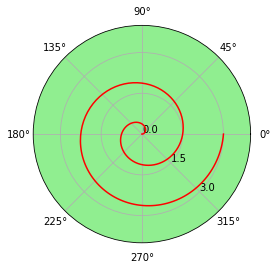

In [2]:
x = np.linspace(0,4*np.pi,300) # 弧度制

y  = np.linspace(0,3,300)

ax = plt.subplot(111,projection = 'polar',facecolor = 'lightgreen') # 极坐标

ax.plot(x,y,color = 'red') # 折线图，

ax.set_rmax(4) # 高度，半径

ax.set_rticks([0,1.5,3])

ax.set_rlabel_position(-45)

<BarContainer object of 8 artists>

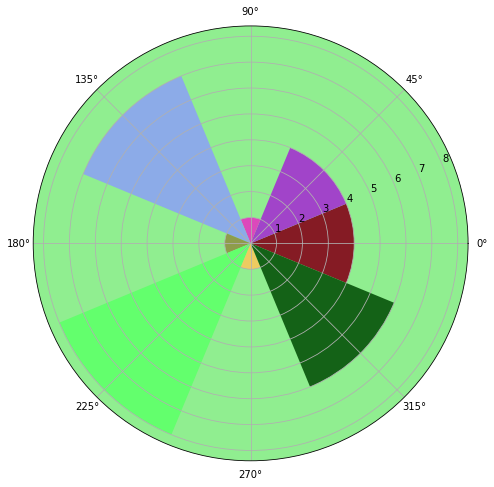

In [3]:
x = np.arange(0,2*np.pi,step = np.pi/4) # 弧度值

y = np.random.randint(1,10,size = 8)

plt.figure(figsize=(8,8))

ax = plt.subplot(111,polar = True,facecolor = 'lightgreen')

ax.bar(x,y,width = np.pi/4,color = np.random.rand(8,3))

### 直方图

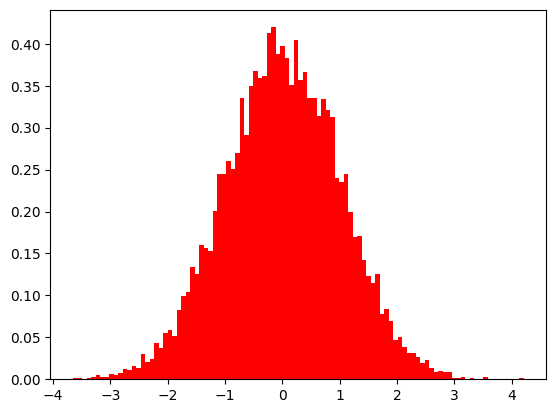

In [7]:
# 数据分布情况
x = np.random.randn(10000) # 正态分布

# count是统计次数；bins范围
count,bins, fig= plt.hist(x,bins = 100,color = 'red',density=True)# 其实就是条形图

In [ ]:
display(count,bins)

In [ ]:
np.histogram(x,bins = 100) # NumPy提供了方法，统计计数

### 箱式图

In [ ]:
# 箱式图，绘制了数据分布情况：四等分位数绘制，同时，将异常值，进行了绘制
x = np.random.randn(500,4)

labels = list('ABCD')

_ = plt.boxplot(x,notch = True,sym = 'ro',labels=labels) # color颜色，marker

In [ ]:
import pandas as pd

pd.DataFrame(x,columns=labels).describe().round(2)

### 散点图

In [ ]:
# 表示属性之间的关系
x = np.random.randn(100,2)

plt.scatter(x[:,0],x[:,1],
            c = np.random.rand(100,3), # 颜色 （红,绿,蓝） 0 ~ 1
            s = np.random.randint(100,300,size = 100),
            alpha=0.5)

In [ ]:
# 表示属性之间的关系
x = np.random.randn(100,2)

plt.scatter(x[:,0],x[:,0] + np.random.randn(100)*0.2,
            c = np.random.rand(100,3), # 颜色 （红,绿,蓝） 0 ~ 1
            s = np.random.randint(100,300,size = 100),
            alpha=0.5)

### 饼图

#### 一般饼图

In [5]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['C:\\WINDOWS\\Fonts\\AGENCYR.TTF',
 'C:\\Windows\\Fonts\\mingliu.ttc',
 'C:\\Windows\\Fonts\\trebucbd.ttf',
 'C:\\Windows\\Fonts\\ROCKB.TTF',
 'C:\\WINDOWS\\Fonts\\ariblk.ttf',
 'C:\\WINDOWS\\Fonts\\STCAIYUN.TTF',
 'C:\\WINDOWS\\Fonts\\GILB____.TTF',
 'C:\\WINDOWS\\Fonts\\YuGothB.ttc',
 'C:\\WINDOWS\\Fonts\\Candaral.ttf',
 'C:\\Windows\\Fonts\\CALISTB.TTF',
 'C:\\Windows\\Fonts\\STZHONGS.TTF',
 'C:\\Windows\\Fonts\\INFROMAN.TTF',
 'C:\\WINDOWS\\Fonts\\ANTQUAB.TTF',
 'C:\\Windows\\Fonts\\MTCORSVA.TTF',
 'C:\\Windows\\Fonts\\FELIXTI.TTF',
 'C:\\WINDOWS\\Fonts\\mingliub.ttc',
 'C:\\WINDOWS\\Fonts\\ariali.ttf',
 'C:\\WINDOWS\\Fonts\\CENTURY.TTF',
 'C:\\WINDOWS\\Fonts\\georgiab.ttf',
 'C:\\Windows\\Fonts\\ONYX.TTF',
 'C:\\WINDOWS\\Fonts\\corbelz.ttf',
 'C:\\WINDOWS\\Fonts\\ROCKB.TTF',
 'C:\\WINDOWS\\Fonts\\cambriaz.ttf',
 'C:\\WINDOWS\\Fonts\\GARA.TTF',
 'C:\\WINDOWS\\Fonts\\constanz.ttf',
 'C:\\Windows\\Fonts\\TEMPSITC.TTF',
 'C:\\WINDOWS\\Fonts\\Dengb.ttf',
 'C:\\Windows\\Fonts\\GLSNECB.

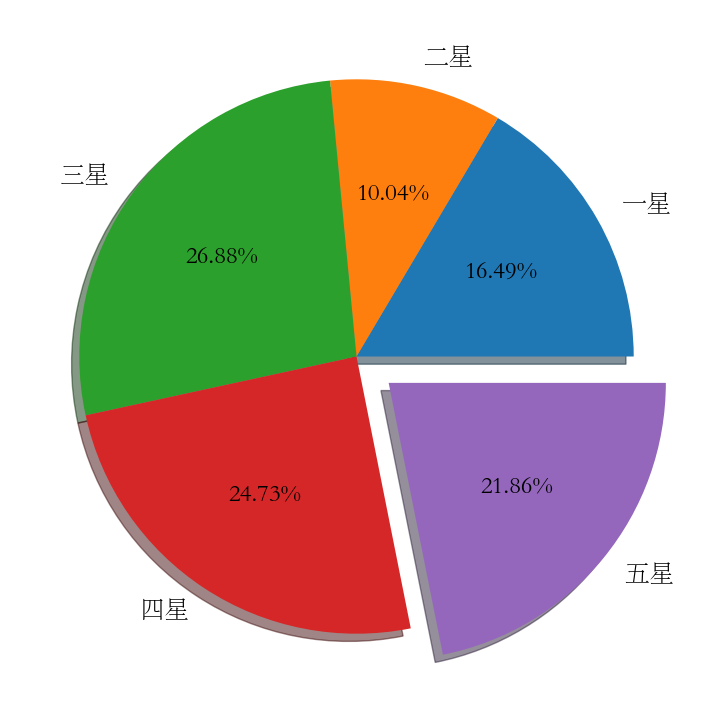

In [6]:
p = np.random.randint(10,100,size = 5)

labels = ['一星','二星','三星','四星','五星']
plt.figure(figsize=(9,9))
_ = plt.pie(p,
            labels= labels,
            textprops={'family':'STSONG','fontsize':18}, # 设置字体样式
            autopct='%0.2f%%', # 显示百分比
            explode = [0,0,0,0,0.15],# 突出某一部分
            shadow=True)

#### 嵌套饼图

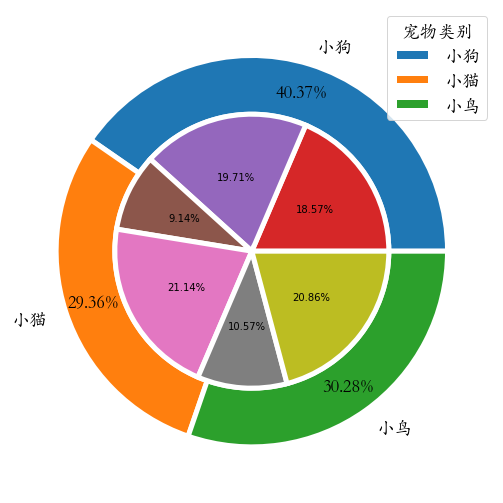

In [15]:
p1 = np.random.randint(30,50,size = 3) # 外圈

p2 = np.random.randint(10,80,size = 6) # 内圈

plt.figure(figsize=(9,9))
plt.pie(p1,radius=1,
        autopct='%0.2f%%',
        pctdistance=0.85,
        labels = ['小狗','小猫','小鸟'],
        wedgeprops={'linewidth':5,# 间隔的宽度
                    'width':0.3, # 饼图的宽度
                    'edgecolor':'white'},# 间隔的颜色
        textprops={'family':'Kaiti SC','fontsize':18})

_ = plt.pie(p2,
        radius=0.7,
        autopct='%0.2f%%',
        pctdistance=0.55,
        wedgeprops={'linewidth':5,# 间隔的宽度
                    'width':0.7, # 饼图的宽度
                    'edgecolor':'white'})# 间隔的颜色

plt.rcParams['font.family'] = 'Kaiti SC' # 全局设置
plt.rcParams['font.size'] = 18
plt.legend(['小狗','小猫','小鸟'],title = '宠物类别',prop = 'Kaiti SC',)

### 热力图

In [ ]:
plt.hist

In [8]:
data = np.random.randn(7,7)*5

data.round(1)

array([[  6.8,   1.3,  -0.8,  -3.7,  -1.3,   1.2,   3.7],
       [ -0.6,  -7.1,   8.4,  -7.2,  -4.6,   8.7,  -3.9],
       [  1.8,   8.5,  -1. ,  -5.6, -12.9,   0.1,  -3.3],
       [ -0.2,   3.9,   2. ,   2.2,  -1.1,  -6.1,  -2.7],
       [ -1.9,   3.9,   1.9,  -0.4,  -6. ,  -0.1,  -3.7],
       [ -2.9,  -1.4,   9.9,  -7.4,  -9. ,  -4.7,  -5.5],
       [ -3.2,   0.6,  -6.6,  -1.9,   1.2,   7.8,  -3. ]])

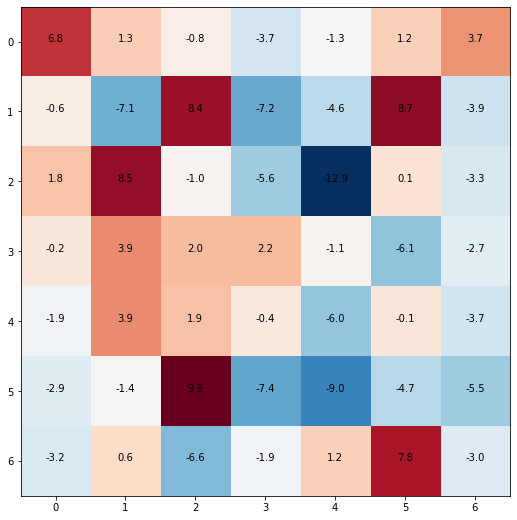

In [9]:
plt.figure(figsize=(9,9))
plt.imshow(data,cmap=plt.cm.RdBu_r) # 展示图片

for i in range(7):
    for j in range(7):
        plt.text(x = j,y = i,s=round(data[i,j],1),ha = 'center')

### 面积图

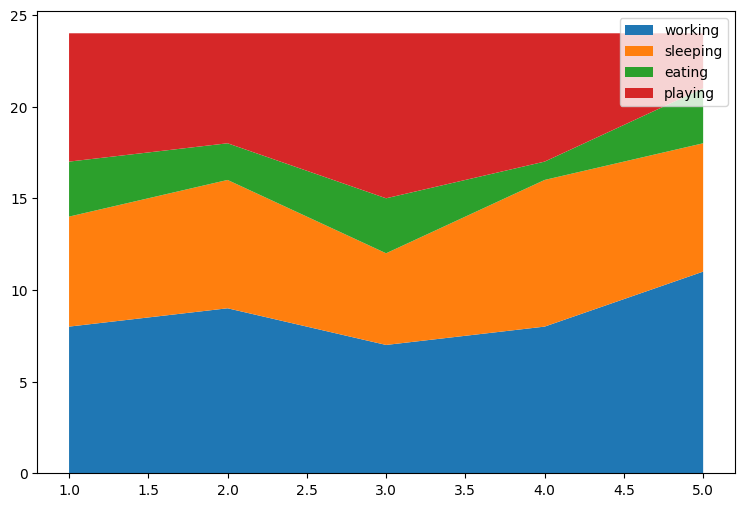

In [3]:
days = np.arange(1,6)

working = np.array([8,9,7,8,11])
sleeping = np.array([6,7,5,8,7])
eating = np.array([3,2,3,1,3])
playing = np.array([7,6,9,7,3])
plt.figure(figsize=(9,6))
plt.stackplot(days,working,sleeping,eating,playing) # 堆叠
plt.legend(['working','sleeping','eating','playing'])

### 蜘蛛图

In [ ]:
labels = np.array(['个人能力','IQ','EQ','团队意识','持续学习','解决问题能力'])

angles = np.arange(0,2*np.pi,np.pi/3) # 弧度
stats = np.random.randint(50,120,size = 6) # 个人能力强弱

# 首尾相连，和原来相比，长度增加了一个
angles = np.concatenate([angles,angles[[0]]])
stats = np.concatenate([stats,stats[[0]]])

plt.figure(figsize=(8,8))
axes = plt.subplot(111,polar = True) # 极坐标图

axes.plot(angles,stats,marker = 'o',lw = 2) # 折线图
axes.fill(angles,stats,alpha = 0.2)

axes.set_thetagrids(angles[:-1]*180/np.pi,labels=labels,fontsize = 18) # 设置了角度显示
_ = axes.set_rgrids([10,30,50,70,90,110])

## 3D图形

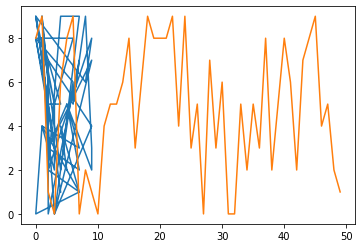

In [14]:
import matplotlib.pyplot as plt
import numpy as np
x = np.random.randint(0,10,size = 50)
y = np.random.randint(0,10,size  = 50)
z = np.random.randint(0,10,size = 50)
plt.plot(x,y,z)

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D # 绘制3D图形对象

x = np.linspace(0,20,300)
y = np.sin(x)
z = np.cos(x)

fig = plt.figure(figsize=(9,6)) # 二维的

ax3 = Axes3D(fig) # 二维视图，放到3D中，变成3D视图
ax3.plot(x,y,z,color = 'red')

# rand 返回数据 0 ~ 1之间
ax3.scatter(np.random.rand(50)*20,
            np.random.rand(50),
            np.random.rand(50),s = 100,color = 'green')

In [ ]:
season = np.arange(1,5) # 四个季度
# 每个季度3个月，每个月都要销量

fig = plt.figure(figsize=(9,6))

ax3 = Axes3D(fig)

for s in season:
    ax3.bar(np.arange(1,4),# 一个季度：三个月。横坐标
            np.random.randint(50,100,size = 3),# 高度，销量，纵坐标
            zs = s, # 偏移量
            zdir = 'x',# 排列方向
            alpha = 0.5)
    
ax3.set_xlabel('X',fontsize = 18,color = 'red')
ax3.set_xticks([1,2,3,4])
ax3.set_xticklabels(['一季度','二季度','三季度','四季度'])
plt.rcParams['font.size'] = 18
_ = ax3.set_yticks([1,2,3])

## <font color = red>实战</font>-拉勾网数据分析师招聘数据分析

### 加载、查看、去重

In [1]:
import numpy as np
import pandas as pd
job = pd.read_csv('./lagou2020.csv')
job.drop_duplicates(inplace=True)
job.reset_index(inplace=True) # 行索引重置：0~最后，从0开始编号
job.head()

,index,positionName,companyShortName,city,companySize,education,financeStage,industryField,salary,workYear,hitags,companyLabelList,job_detail
0,0,高级数据分析师,拉勾网,北京,500-2000人,本科,D轮及以上,企业服务,25k-35k,5-10年,"[""免费下午茶"",""ipo倒计时"",""bat背景"",""地铁周边"",""每天管两餐"",""定期团建...","[""五险一金"",""弹性工作"",""带薪年假"",""免费两餐""]",\n1.搭建数据指标框架，完整并准确反映业务趋势和变化，及时发现和定位问题\n2.独立完成数...
1,1,数据分析师,OK Group,北京,500-2000人,大专,B轮,金融,25k-45k,5-10年,NaN,"[""节日礼物"",""年度旅游"",""扁平管理"",""领导好""]",\n工作职责：\n1. 负责建立交易平台日常分析体系，包括核心指标体系、报表体系，专题活动分...
2,2,高级数据分析师,金山办公软件,北京,2000人以上,本科,上市公司,移动互联网,15k-25k,3-5年,NaN,"[""年底双薪"",""节日礼物"",""技能培训"",""绩效奖金""]",\n职位描述：1.对亿计的办公用户数据进行深度挖掘，引导产品、运营，并能实际应用到业务中带来...
3,3,数据分析师,金山办公软件,北京,2000人以上,本科,上市公司,移动互联网,15k-25k,1-3年,NaN,"[""年底双薪"",""节日礼物"",""技能培训"",""绩效奖金""]",\n工作职责：-负责日常运营、业务数据等分析-针对产品需求做深入的数据分析报告，分析用户行为...
4,4,数据分析师,京东集团,北京,2000人以上,本科,上市公司,电商,15k-30k,3-5年,"[""免费班车"",""免费体检"",""地铁周边""]","[""五险一金"",""带薪年假"",""免费班车"",""定期体检""]",\n【数据分析师岗】\n岗位要求：\n1、构建及维护客户体验相关数据报表平台；\n2、与大数...


In [2]:
job.companySize.unique()

array(['500-2000人', '2000人以上', '150-500人', '50-150人', '15-50人', '少于15人'],
      dtype=object)

### 过滤非数据分析岗位

In [3]:
# contains这个是字符串中方法，进行逻辑判断，是否含有
cond = job['positionName'].str.contains('数据分析')
job = job[cond]
job.reset_index(inplace=True) # 重置行索引

### 薪水

In [4]:
# applymap和map类似的，map操作Series，applymap操作的DataFrame
job['salary'] = job['salary'].str.lower().str.extract(r'(\d+)[k]-(\d+)[k]')\
             .applymap(lambda x : int(x)).mean(axis = 1)

### 技能要求¶
Python  
SQL  
Tableau  
Excel  
SPSS/SAS

In [5]:
job['job_detail'] = job['job_detail'].str.lower() # 变成小写
job['Python'] = job['job_detail'].map(lambda x :1 if 'python' in x else 0)
job['SQL'] = job['job_detail'].map(lambda x : 1 if 'sql' in x else 0)
job['Tableau'] = job['job_detail'].map(lambda x :1 if 'tableau' in x else 0)
job['Excel'] = job['job_detail'].map(lambda x :1 if 'excel' in x else 0)
job['SPSS/SAS'] = job['job_detail'].map(lambda x :1 if ('spss' in x) or ('sas' in x) else 0)

### 行业信息

In [6]:
# 行业信息转化，明确
def convert(x):
    field = x.split(',')
    if (field[0] == '移动互联网') & (len(field) > 1):
        return field[1]
    else:
        return field[0]
job['industryField'] = job.industryField.map(convert)

In [7]:
job.to_excel('./数据分析师薪资.xlsx',index=False)

### 各城市对数据分析岗位的需求量

两种常用颜色：浅蓝色：<font color = '#3c7f99'> #3c7f99 </font>，淡黄色：<font color = '#c5b783'>#c5b783</font>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Kaiti SC'
plt.rcParams['font.size'] = 18

Text(0.5, 1.0, '      各城市数据分析师岗位需求量      ')

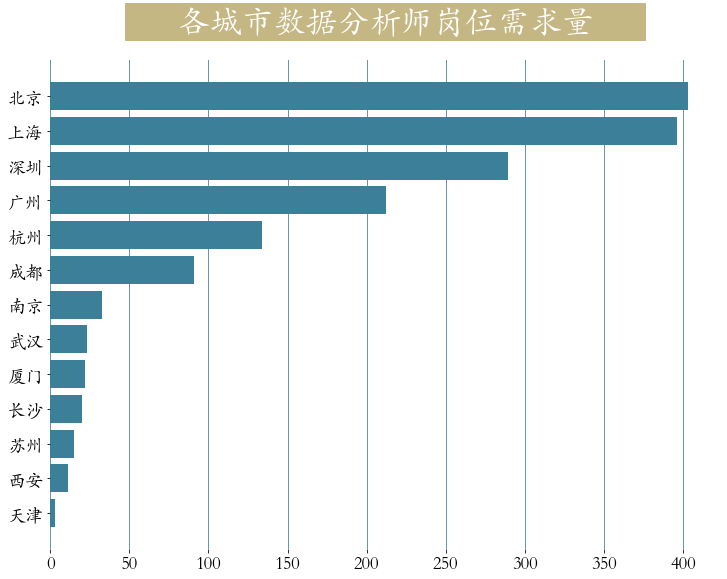

In [9]:
data = job.city.value_counts()
plt.figure(figsize=(12,9))
plt.barh(y = data.index[::-1],width=data[::-1],color = '#3c7f99')
plt.box(False) # 去掉边框
plt.grid(axis='x',color = '#3c7f99') # 网格线

plt.title(label='      各城市数据分析师岗位需求量      ',
          fontsize = 32,
          backgroundcolor = '#c5b783',
          color = 'white',
          weight = 'bold',
          pad = 30) # 标题和上边界的间隔

### 不同领域对数据分析师需求情况

Text(0.5, 1.0, '       各领域数据分析师需求量       ')

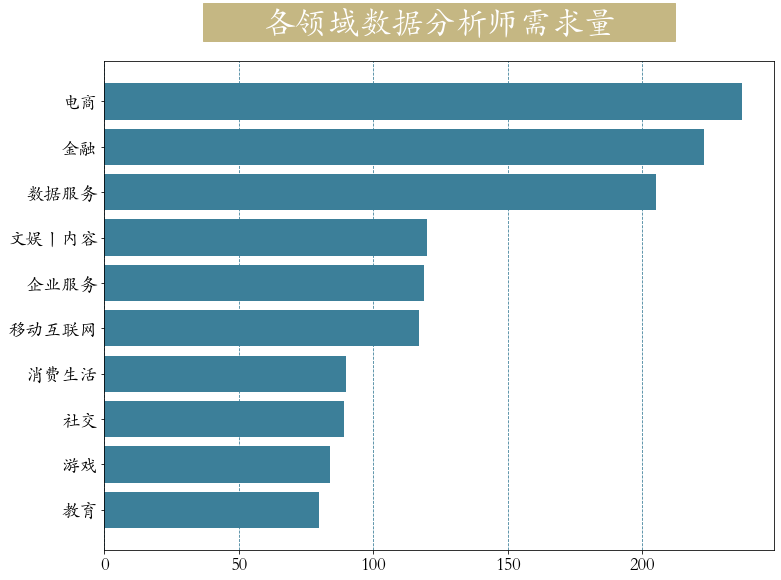

In [10]:
data = job.industryField.value_counts()[:10]
plt.figure(figsize=(12,9))
plt.barh(y = data.index[::-1],width=data[::-1],color = '#3c7f99')

plt.grid(linestyle = '--',color = '#3c7f99',axis = 'x')

plt.title(label='       各领域数据分析师需求量       ',
          fontsize = 32,
          color = 'white',
          backgroundcolor ='#c5b783',pad = 30 )

### 各城市薪资状况

In [8]:
salary = job.groupby(by = 'city')['salary'].mean().sort_values()

plt.figure(figsize=(12,9))

plt.bar(x = salary.index,height=salary,
        color = plt.cm.RdBu_r(np.linspace(0,1,salary.size)))

plt.title(label = '        各城市薪资状况          ',
          fontsize = 32,
          color = 'white',backgroundcolor = '#c5b783',weight = 'bold',pad = 30)

plt.box(False)
plt.grid(axis = 'y',color = 'k')

plt.tick_params(labelsize = 18,rotation = 63)

NameError: name 'job' is not defined

### 各城市工作年限与薪资关系

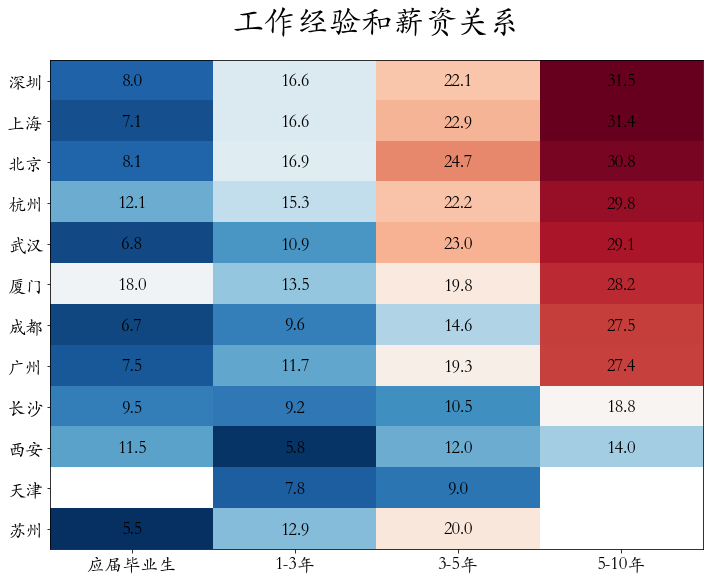

In [12]:
# 透视表
# job.pivot_table(values='salary',index='city',columns='workYear').round(1)

# 分组聚合
years_salary = job.groupby(by = ['city','workYear'])['salary']\
.mean().round(1).unstack().sort_values(by = '5-10年',ascending = False)
year_salary = years_salary[['应届毕业生','1-3年','3-5年','5-10年']].iloc[1:]

nd = year_salary.values
data = np.repeat(nd,4,axis = 1) # 列进行了复制4份，绘制图形美观

plt.figure(figsize=(12,9))
plt.imshow(data,cmap = plt.cm.RdBu_r)

plt.xticks([1.5,5.5,9.5,13.5],year_salary.columns)
plt.yticks(np.arange(12),year_salary.index)

h,w = data.shape # h = 13,w = 16(4*4)
for x in range(w):
    for y in range(h):
        if (x%4 == 0) and (~np.isnan(data[y,x])):
            plt.text(x+1.5,y,data[y,x],ha = 'center',va = 'center')
            
_ = plt.title(label = '       工作经验和薪资关系       ',fontsize = 32,pad = 30)

### 学历情况

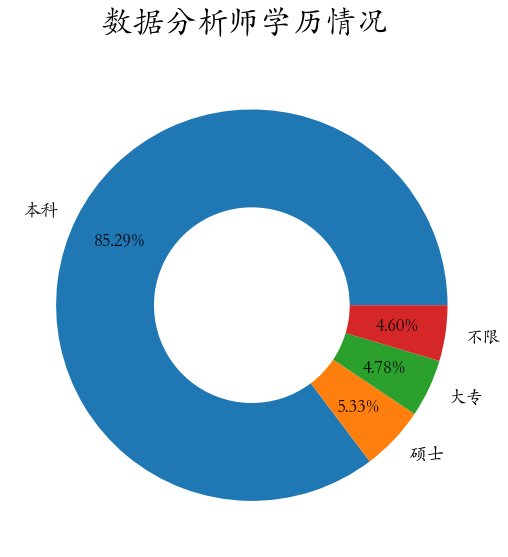

In [13]:
edu = job['education'].value_counts()
plt.figure(figsize=(9,9))
_ = plt.pie(edu,autopct='%0.2f%%',
            labels=edu.index,wedgeprops={'width':0.5},
            pctdistance=0.75)
_ = plt.title(label='       数据分析师学历情况         ',fontsize = 32,pad = 30)

### 技能要求

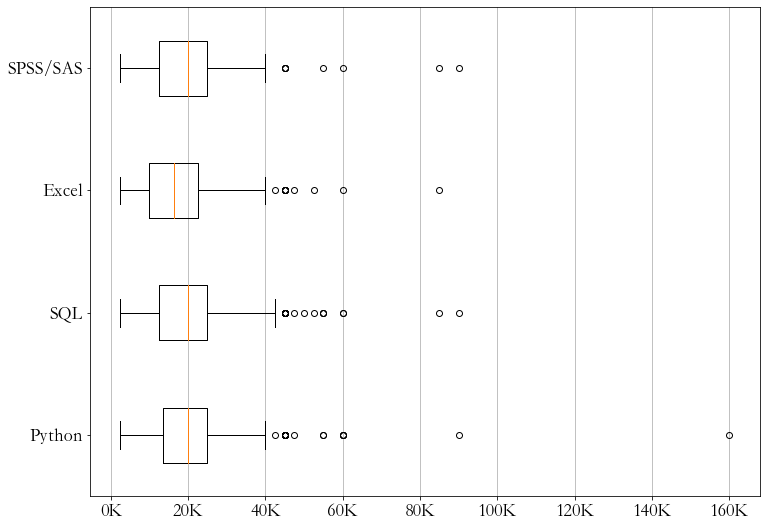

In [14]:
cond1 = job['Python'].astype('boolean') # 根据条件筛选
cond2 = job['SQL'].astype('boolean') # 根据条件筛选
cond3 = job['Excel'].astype('boolean') # 根据条件筛选
cond4 = job['SPSS/SAS'].astype('boolean') # 根据条件筛选

d1 = job[cond1]['salary']
d2 = job[cond2]['salary']
d3 = job[cond3]['salary']
d4 = job[cond4]['salary']


plt.figure(figsize=(12,9))
a = plt.boxplot([d1,d2,d3,d4],vert = False,labels=['Python','SQL','Excel','SPSS/SAS'])
plt.grid(axis = 'x',color = 'k',alpha = 0.3)
_ = plt.xticks(np.arange(0,161,step = 20),
           [str(i) + 'K' for i in np.arange(0,161,step = 20)])

### 大厂对技能要求

In [15]:
colors = ['#ff0000', '#ffa500', '#c5b783', '#3c7f99', '#0000cd']

In [16]:
cond = job.companySize == '2000人以上'
bc = job[cond] # 大公司筛选

In [17]:
data = bc[['Python','SQL','Tableau','Excel','SPSS/SAS']].sum()
data

Python      278
SQL         392
Tableau      91
Excel       201
SPSS/SAS    105
dtype: int64

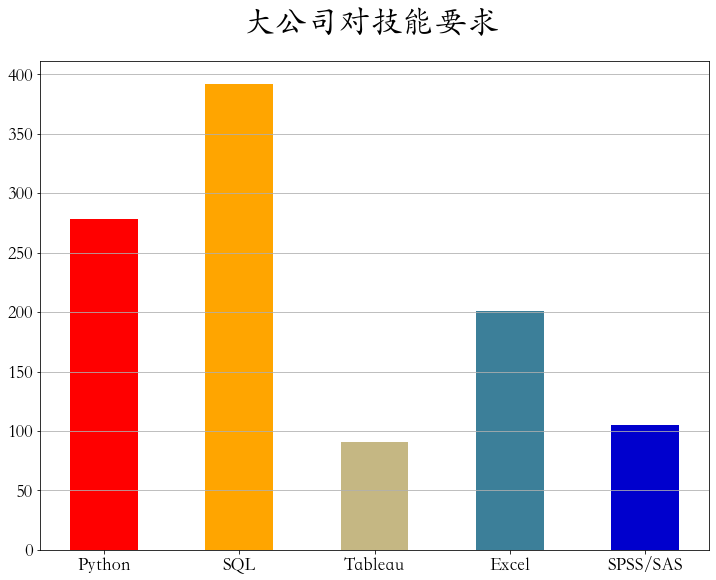

In [18]:
plt.figure(figsize=(12,9))
plt.bar(x = np.arange(5),
        height=data,
        tick_label = ['Python','SQL','Tableau','Excel','SPSS/SAS'],
        color = colors,width = 0.5)

plt.title(label='      大公司对技能要求       ',fontsize = 32,pad = 30)
plt.grid(axis = 'y')

### 不同规模公司招人要求

In [44]:
workYear_map = {
    "应届毕业生": 1,
    "1年以下": 2,
    "1-3年": 3,
    "3-5年": 4,
    "5-10年": 5,
    }
color_map = {
    5:"#ff0000",
    4:"#ffa500",
    3:"#c5b783",
    2:"#3c7f99",
    1:"#0000cd"}
cond = job.workYear.isin(workYear_map) # 判断是否在数据集合中，True,Flase
job2 = job[cond]
job2['workYearNum'] = job2['workYear'].map(workYear_map)
# 将 str类型转换成了类别性，特殊的数据类型，排序
job2['companySize'] = job2['companySize'].astype('category')

数据分析三剑客：NumPy、pandas、Matplotlib

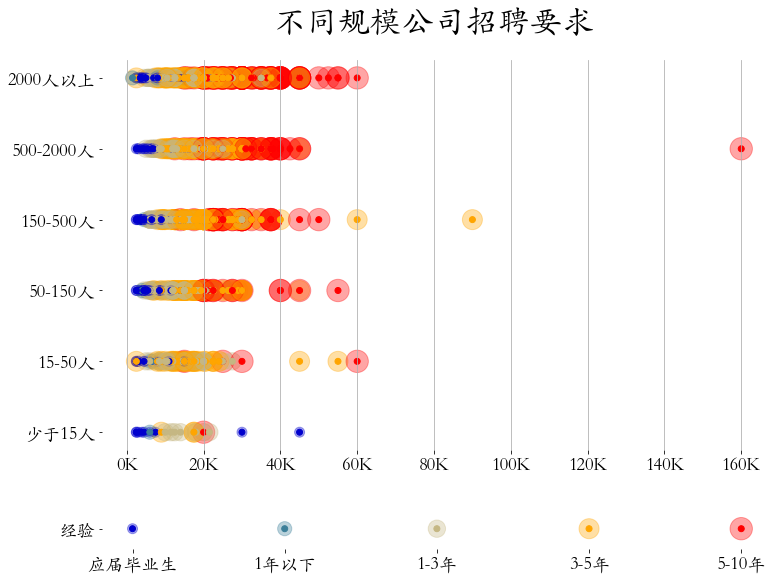

In [45]:
from matplotlib import gridspec
plt.figure(figsize=(12,9))
list_num = ['2000人以上','500-2000人','150-500人','50-150人','15-50人','少于15人']
# re order 重新排序
job2.companySize.cat.reorder_categories(list_num,inplace = True)
job2.sort_values(by = 'companySize',ascending=False,inplace = True)

gs = gridspec.GridSpec(10,1) # 整张图片分成了10份，10行
plt.subplot(gs[:8]) # 子视图，占位置上面的8行
plt.scatter(x =job2.salary ,
            y = job2.companySize,
            c = job2.workYearNum.map(color_map),
            s = job2.workYearNum*100,alpha=0.35)
plt.scatter(x =job2.salary ,
            y = job2.companySize,
            c = job2.workYearNum.map(color_map)) # 点中点效果


plt.xticks(np.arange(0,161,step = 20),[str(i) + 'K' for i in np.arange(0,161,20)])
plt.grid(axis = 'x')
plt.box(False)
plt.title(label='         不同规模公司招聘要求          ',fontsize = 32,pad = 30)

plt.subplot(gs[-1]) # 最后一行

x = np.arange(1,6)
y = np.zeros(5)

plt.scatter(x,y,c = list(color_map.values())[::-1],
            s = x*100,alpha= 0.35)
plt.scatter(x,y,c = list(color_map.values())[::-1])
plt.yticks([0],['经验'])
plt.xticks(x,workYear_map.keys())
plt.box(False)

In [37]:
workYear_map.keys()

dict_keys(['应届毕业生', '1年以下', '1-3年', '3-5年', '5-10年'])

In [42]:
color_map.values()

dict_values(['#ff0000', '#ffa500', '#c5b783', '#3c7f99', '#0000cd'])